In [2]:
import pandas as pd

# wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import seaborn as sns
import collections

In [3]:
# Import dataset
df = pd.read_csv('../Data/2. Clean/clean.csv')

# Menampilkan total dataset
print("Total Dataset :", len(df))

df.head()

Total Dataset : 4804


,video_id,comment_text,text_cleaned,text_removal,text_normalized,text_manual_replaced,text_tokenize
0,video1,Baiknya bagaimana menurut kalian?,baiknya bagaimana menurut kalian,baik bagaimana turut kalian,baik bagaimana turut kalian,baik bagaimana turut kalian,"['baik', 'bagaimana', 'turut', 'kalian']"
1,video1,Betul dok betul dok,betul dok betul dok,betul dok betul dok,betul dok betul dok,betul dok betul dok,"['betul', 'dok', 'betul', 'dok']"
2,video1,Betul dok mungkin efek sa di,betul dok mungkin efek sa di,betul dok mungkin efek sa,betul dok mungkin efek sa,betul dok mungkin efek sa,"['betul', 'dok', 'mungkin', 'efek', 'sa']"
3,video1,"Bpom aneh, tidak kerja. Kenapa ko seperti itu.",bpom aneh tidak kerja kenapa ko seperti itu,bpom aneh kerja ko itu,bpom aneh kerja kok itu,bpom aneh kerja kok itu,"['bpom', 'aneh', 'kerja', 'kok', 'itu']"
4,video1,Benar banget anak sy aj hrs sirup minum obatny...,benar banget anak sy aj hrs sirup minum obatny...,benar banget anak sy aj hrs sirup minum obat d...,benar banget anak saya saja harus sirup minum ...,benar banget anak aku saja harus sirup minum o...,"['benar', 'banget', 'anak', 'aku', 'saja', 'ha..."


Missing Values

In [4]:
# Mengecek jumlah nilai null dalam setiap kolom
df.isnull().sum()

video_id                 0
comment_text             0
text_cleaned            11
text_removal            11
text_normalized         11
text_manual_replaced    11
text_tokenize            0
dtype: int64

In [5]:
# Menghapus baris dengan nilai null
df.dropna(inplace=True)

# Mengecek kembali jumlah nilai null
df.isnull().sum()

video_id                0
comment_text            0
text_cleaned            0
text_removal            0
text_normalized         0
text_manual_replaced    0
text_tokenize           0
dtype: int64

Duplicate Values

In [6]:
# Mengecek keberadaan baris duplikat
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4799    False
4800    False
4801    False
4802     True
4803    False
Length: 4793, dtype: bool

In [7]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

Wordcloud

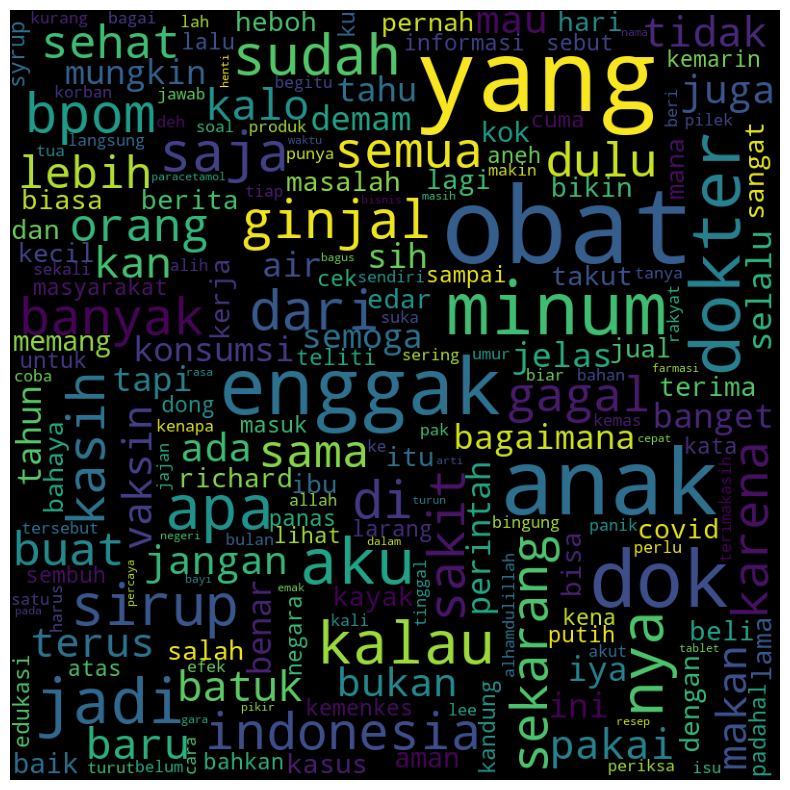

In [8]:
# Menggabungkan semua teks yang telah dibersihkan menjadi satu string
all_text = " ".join(df['text_manual_replaced'])

# Membuat objek WordCloud dengan parameter yang ditentukan
wordcloud = WordCloud(width=800, height=800, max_font_size=110, collocations=False).generate(all_text)

# Menampilkan WordCloud dalam ukuran 10x10
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Frekuensi kemunculan kata

In [9]:
# Menghitung frekuensi kata dalam 'all_text'
c = collections.Counter(all_text.split())

# Mengambil 100 kata yang paling umum beserta frekuensinya
most_common = c.most_common(100)
key = [word for word, freq in most_common]  # Mengambil kata-kata
val = [freq for word, freq in most_common]  # Mengambil frekuensi

print(key, val)

['obat', 'yang', 'anak', 'dok', 'enggak', 'minum', 'dokter', 'aku', 'jadi', 'nya', 'kalau', 'apa', 'sirup', 'sudah', 'dari', 'saja', 'bpom', 'ginjal', 'di', 'kasih', 'sakit', 'indonesia', 'banyak', 'sekarang', 'karena', 'semua', 'gagal', 'dulu', 'buat', 'sehat', 'orang', 'sama', 'lebih', 'baru', 'kalo', 'kan', 'batuk', 'makan', 'pakai', 'tidak', 'terus', 'vaksin', 'juga', 'mau', 'ada', 'jangan', 'bukan', 'bagaimana', 'mungkin', 'sih', 'tahu', 'tahun', 'konsumsi', 'banget', 'iya', 'jelas', 'selalu', 'semoga', 'demam', 'ini', 'air', 'tapi', 'benar', 'perintah', 'memang', 'aman', 'baik', 'kok', 'terima', 'dan', 'itu', 'lama', 'kayak', 'richard', 'kasus', 'berita', 'heboh', 'hari', 'sangat', 'lagi', 'bikin', 'dengan', 'bisa', 'covid', 'biasa', 'edar', 'beli', 'kerja', 'takut', 'masalah', 'pernah', 'kecil', 'ibu', 'salah', 'jual', 'bahaya', 'mana', 'masyarakat', 'kemarin', 'ku'] [2457, 2248, 1799, 1298, 1283, 1108, 975, 835, 822, 735, 727, 718, 670, 654, 641, 620, 612, 599, 571, 565, 537, 5

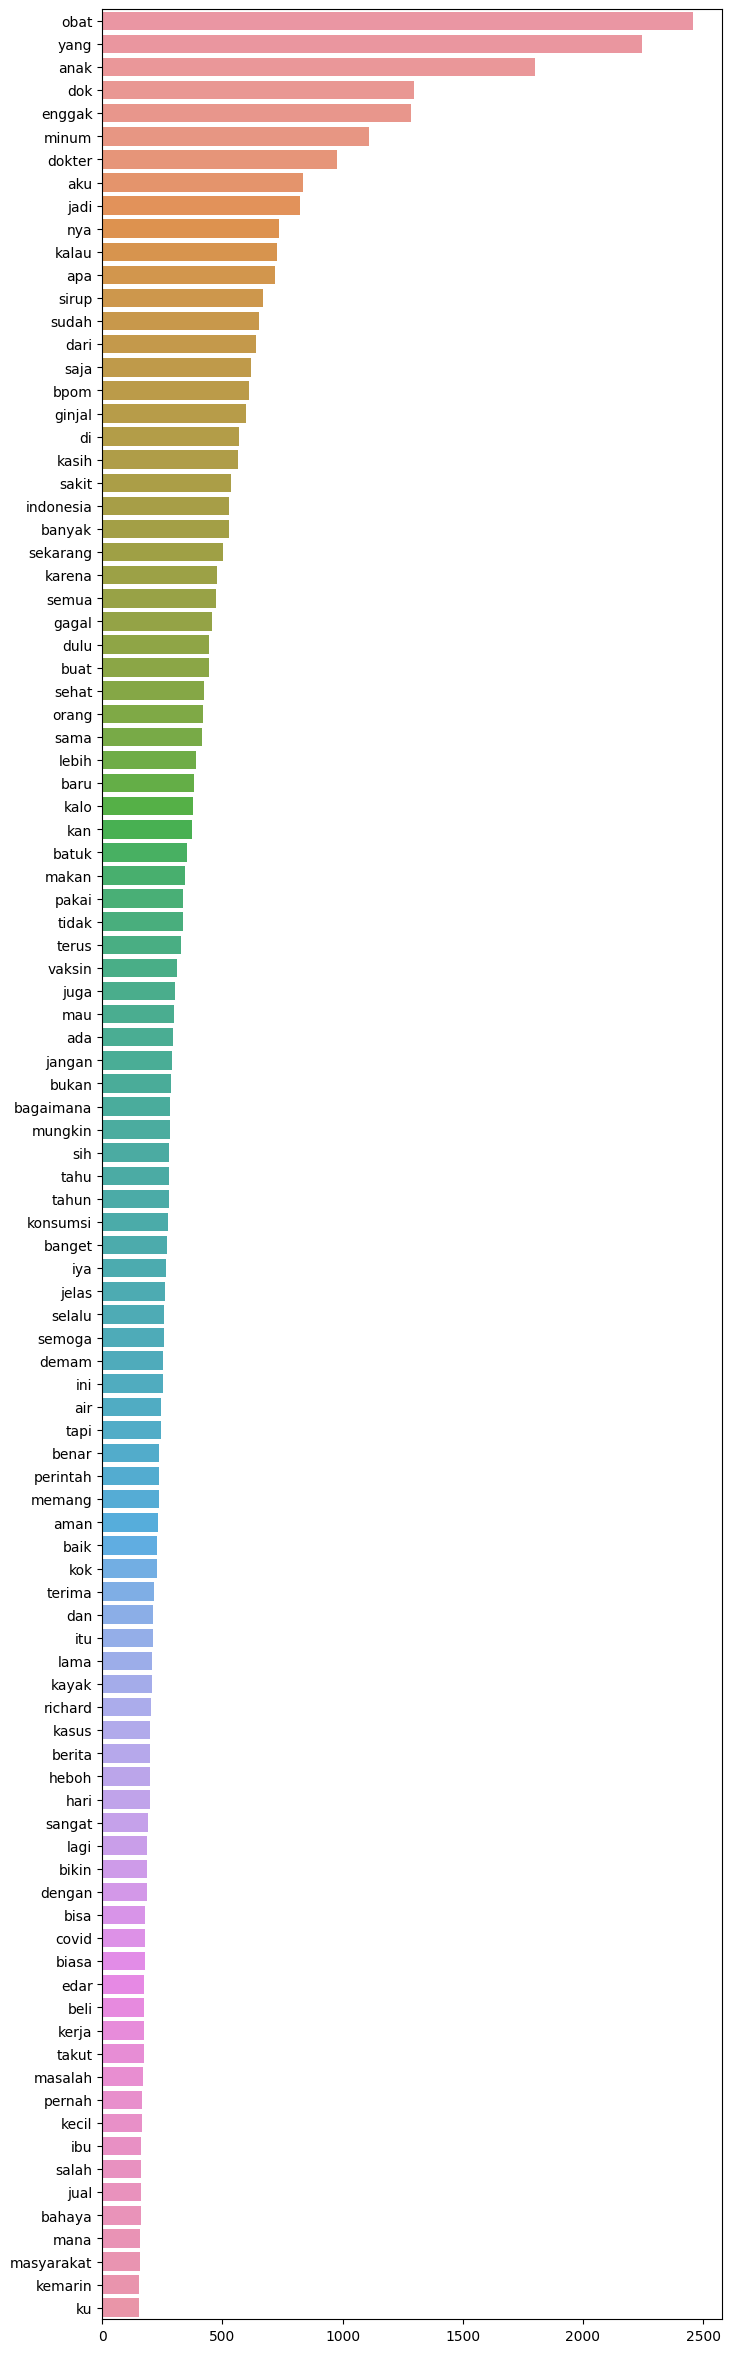

In [10]:
# Membuat bar plot dengan ukuran 8x30 untuk menampilkan frekuensi kata
plt.figure(figsize=(8, 30))
sns.barplot(x=val, y=key)
plt.show()

In [11]:
df.to_csv('../Data/3. EDA/clean-eda.csv', index=False)

In [12]:
df_ = df[['video_id', 'comment_text', 'text_manual_replaced']]
df_.columns = ['video_id', 'raw', 'text']
df_

,video_id,raw,text
0,video1,Baiknya bagaimana menurut kalian?,baik bagaimana turut kalian
1,video1,Betul dok betul dok,betul dok betul dok
2,video1,Betul dok mungkin efek sa di,betul dok mungkin efek sa
3,video1,"Bpom aneh, tidak kerja. Kenapa ko seperti itu.",bpom aneh kerja kok itu
4,video1,Benar banget anak sy aj hrs sirup minum obatny...,benar banget anak aku saja harus sirup minum o...
...,...,...,...
4798,video3,Lanjut Parodi,lanjut parodi
4799,video3,Richard Lee❤❤❤,richard lee
4800,video3,Selamat Siang,selamat siang
4801,video3,Richard Lee Hebat,richard lee hebat


In [14]:
df_.to_csv('../Data/3. EDA/clean-eda_.csv', index=False)